# Лабораторне заняття №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Розподіл Бернуллі

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Bernoulli(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

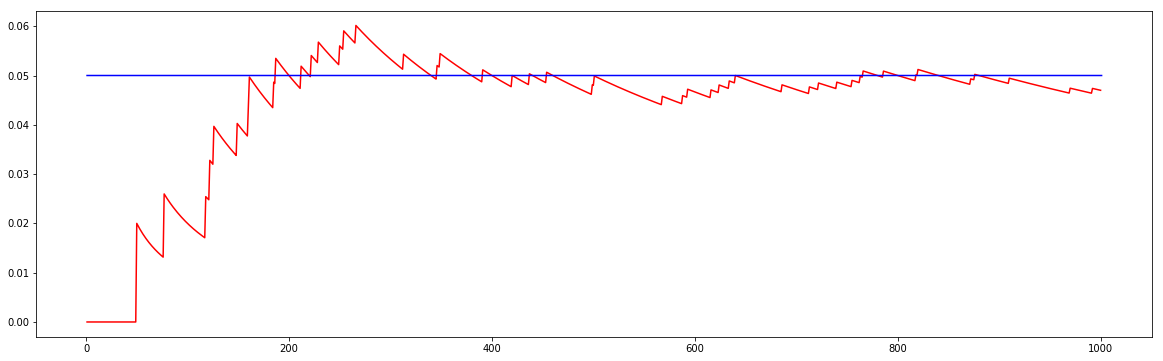

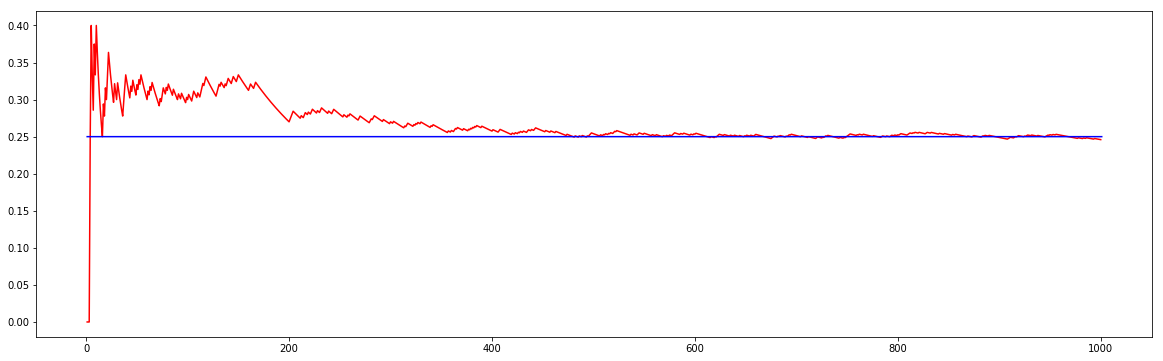

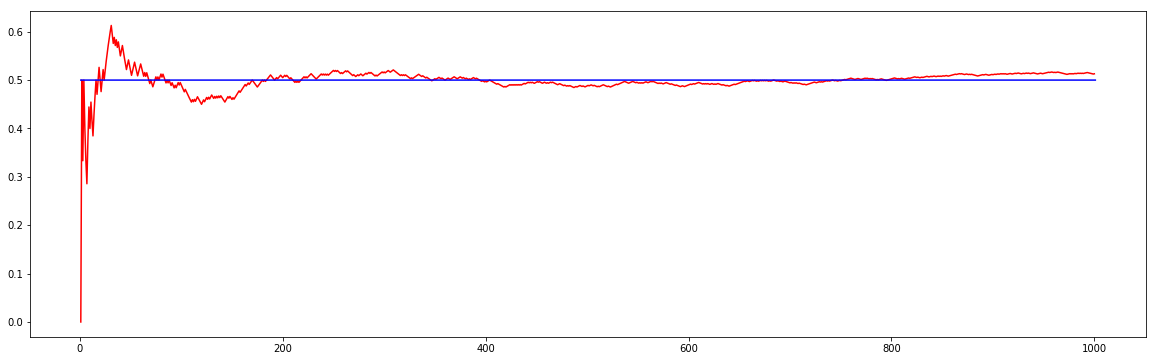

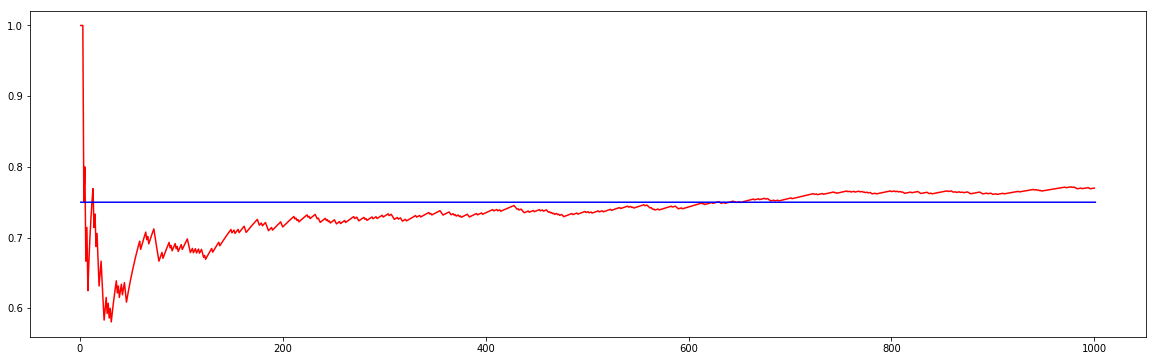

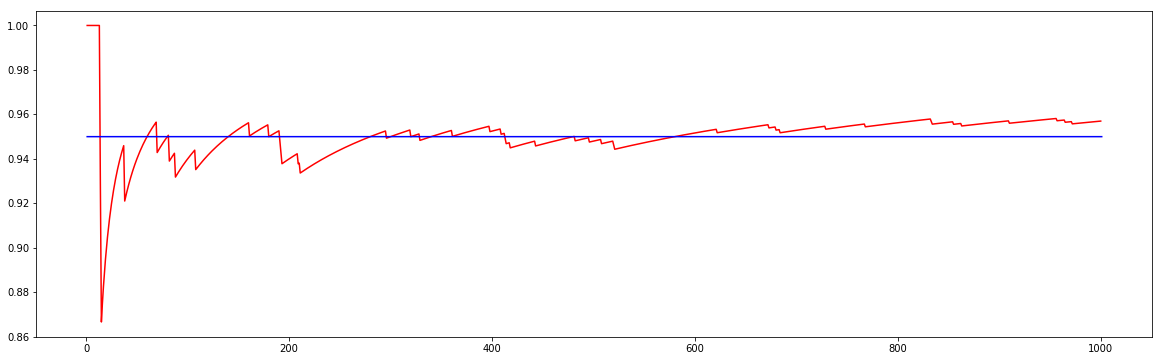

In [5]:
# Місце для Вашого коду
from scipy.stats import bernoulli


p =[ 0.05, 0.25, 0.5, 0.75, 0.95]
for i in p:
    xi=bernoulli(i)
    rvs=xi.rvs(1000)
    x=np.arange(1, 1001)
    #print(x)
    x1=np.arange(1, 1001, 0.01)
    Sn=(np.cumsum(rvs))
    fig, axs=plt.subplots(1, 1, figsize=(20, 6))
    axs.plot(x, Sn/x, 'r')
    axs.plot(x1, x1*0+i, 'b')
    plt.show()

#### 1.1.1 Функція `numpy.cumsum`

Більш детальна інформація про функцію `numpy.cumsum` в [документації](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).

In [2]:
a = np.arange(10)
print(a)
print(np.cumsum(a)) # as a NumPy function
print(a.cumsum()) # as a NumPy array method

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]
[ 0  1  3  6 10 15 21 28 36 45]


In [4]:
a = a.reshape((2,5)) # reshape vector to a 2x5 matrix
print(a)
print(a.cumsum()) # matrix will flatten back to a vector
print(a.cumsum(axis=0)) # cumulative sum over rows for each column
print(a.cumsum(axis=1)) # cumulative sum over columns for each row

[[0 1 2 3 4]
 [5 6 7 8 9]]
[ 0  1  3  6 10 15 21 28 36 45]
[[ 0  1  2  3  4]
 [ 5  7  9 11 13]]
[[ 0  1  3  6 10]
 [ 5 11 18 26 35]]


### 1.2 Експоненційний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Exp(\lambda), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $\lambda = 0.5, 1, 2, 5$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $\lambda$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

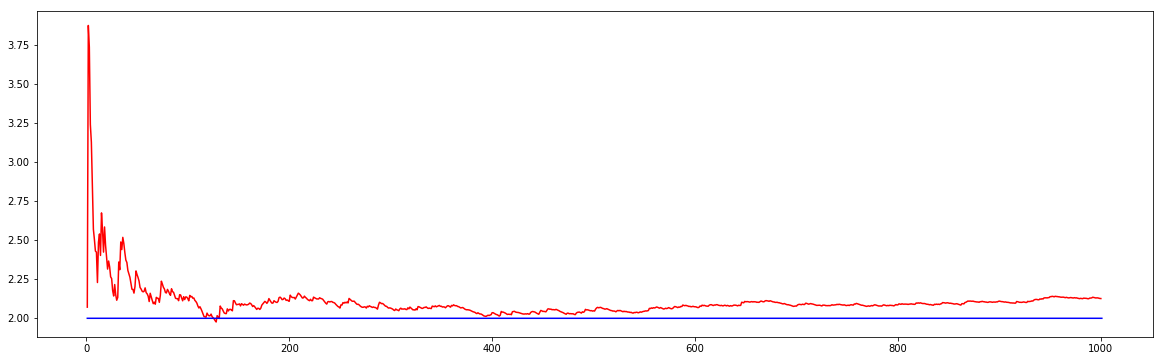

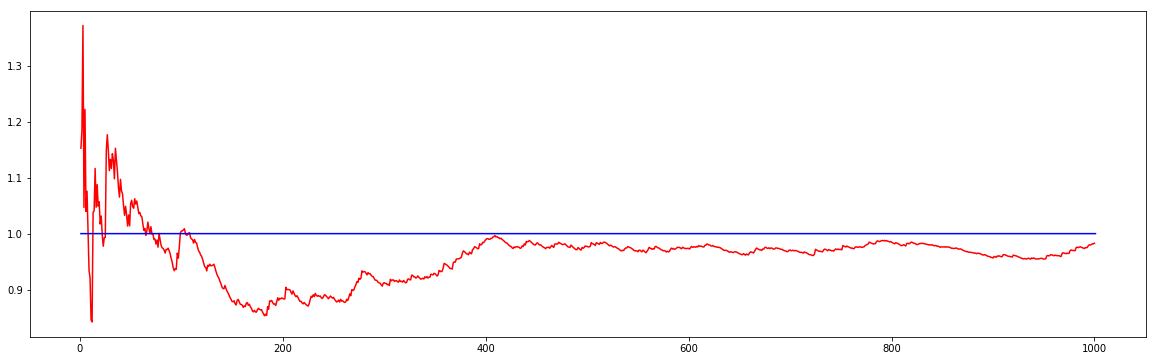

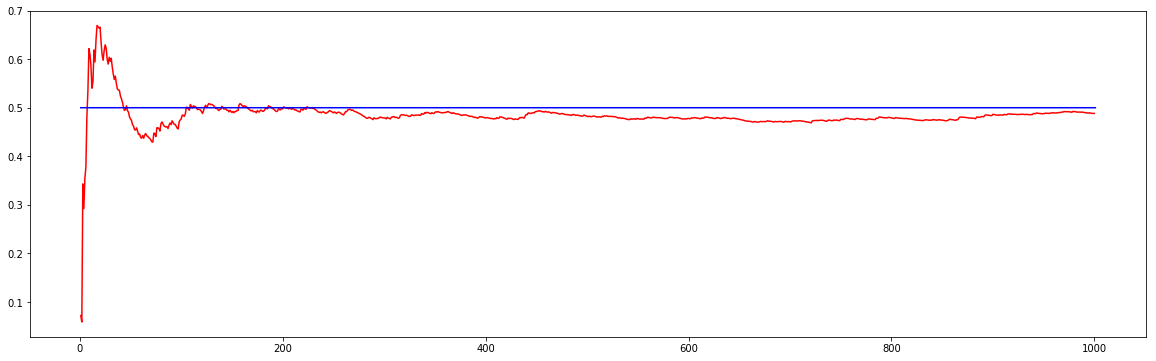

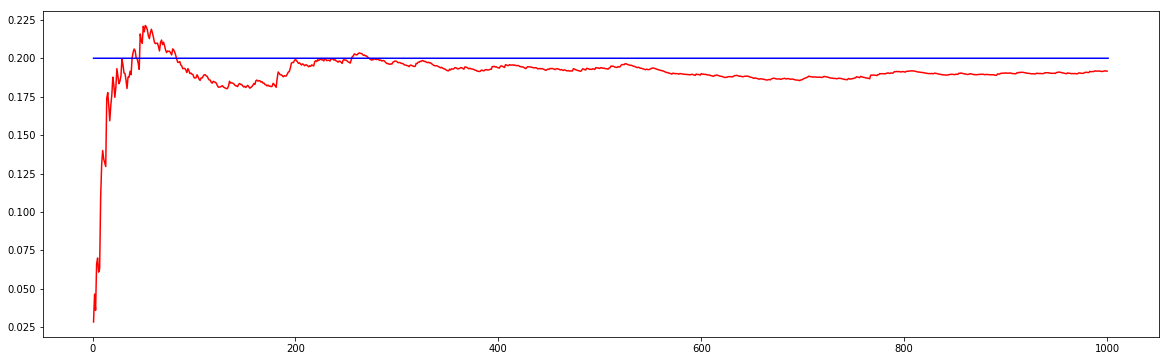

In [6]:
# Місце для Вашого коду
from scipy.stats import expon
p=[0.5,1,2,5]
for i in p:
    xi=expon(loc=0, scale=1/i)
    rvs=xi.rvs(1000)
    x=np.arange(1, 1001)
    #print(x)
    x1=np.arange(1, 1001, 0.01)
    Sn=(np.cumsum(rvs))
    fig, axs=plt.subplots(1, 1, figsize=(20, 6))
    axs.plot(x, Sn/x, 'r')
    axs.plot(x1, x1*0+1/i, 'b')
    plt.show()

### 1.3 Задача 1.23.12

Випадкові величини $(\xi_n, n \geq 1)$
незалежні, однаково розподілені, $E[\xi_1] = 0, D(\xi_1) = 1$.
Довести, що $\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}} \xrightarrow{w} 0$.

Нехай $\xi_n \sim N(0, 1)$.

Зобразіть графічно описану в задачі збіжність.

1. Зобразіть графік функції $\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}}$
в залежності від $n = 1, \ldots, 100000$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз
$\displaystyle \frac{\max_{1 \leq k \leq n} |\xi_k|}{\sqrt{n}}$.
3. Виведіть значення цього виразу в точках $n = 10, 100, 1000, 10000, 100000$.
4. Зверність увагу на швидкість збіжності.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

0.6778253111554879
0.3264498519209559
0.105078220445311
0.043898412287762804
0.013881896849445338


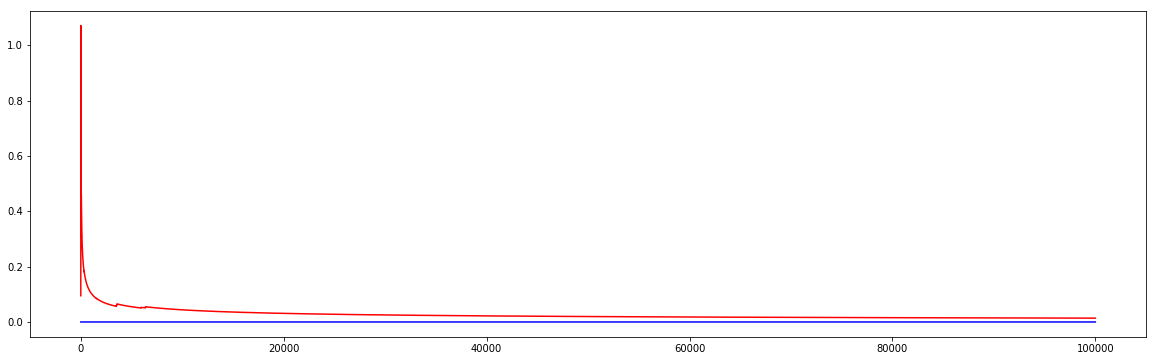

In [11]:
# Місце для Вашого коду
from scipy.stats import norm
for i in range (1):
    xi=norm()
    rvs=abs(xi.rvs(100000))
    x=np.arange(1, 100001)
    #print(x)
    list_=[]
    𝑛=[10,100,1000,10000,100000]
    for j in range (1, 100001):
        a=np.maximum.accumulate(rvs[0:j])[-1]/np.sqrt(j)
        list_.append(a)
        if j in n:
            print(a)
    x1=np.arange(1, 100001, 0.01)
    list_1=np.array(list_)
    fig, axs=plt.subplots(1, 1, figsize=(20, 6))
    axs.plot(x, list_1, 'r')
    axs.plot(x1, x1*0, 'b')
    plt.show()


#### 1.3.1 Функція `numpy.maximum.accumulate`

Більш детальна інформація про функцію `numpy.ufunc.accumulate` в [документації](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.ufunc.accumulate.html).

In [41]:
a = np.random.randint(10, size=10)
print(a)
print(np.maximum.accumulate(a))

[0 4 6 6 1 5 9 5 8 2]
[0 4 6 6 6 6 9 9 9 9]


In [43]:
a = a.reshape((2,5)) # reshape vector to a 2x5 matrix
print(a)
print(np.maximum.accumulate(a, axis=0)) # maximum over rows for each column
print(np.maximum.accumulate(a)) # axis=0 by default
print(np.maximum.accumulate(a, axis=1)) # maximum over columns for each row

[[0 4 6 6 1]
 [5 9 5 8 2]]
[[0 4 6 6 1]
 [5 9 6 8 2]]
[[0 4 6 6 1]
 [5 9 6 8 2]]
[[0 4 6 6 6]
 [5 9 9 9 9]]


## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} x^2 \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

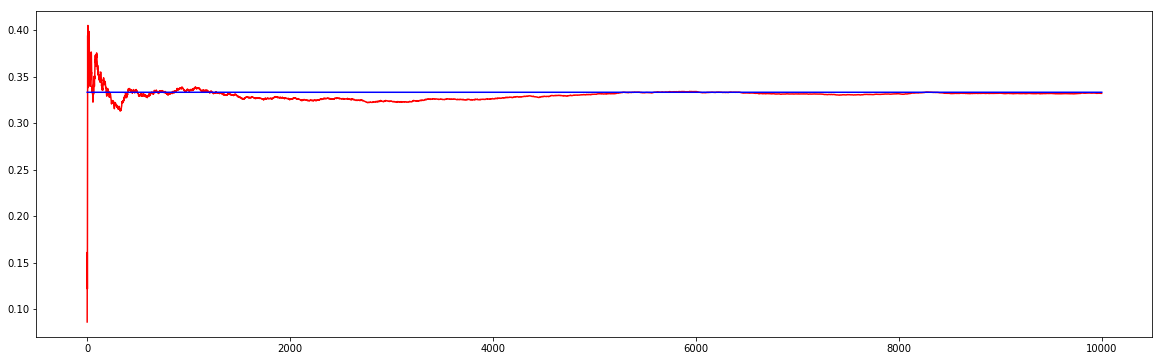

In [19]:
# Місце для Вашого коду
from scipy.stats import uniform
xi=uniform()
m=1
x=np.arange(1, 10001)
rvs=xi.rvs(10000)
a=np.cumsum((rvs)**2)
n=np.arange(1, 10001)
x1=np.arange(1, 10001, 0.01)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))
axs.plot(x, a/n, 'r')
axs.plot(x1, x1*0+1/3, 'b')
plt.show()

### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^2} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

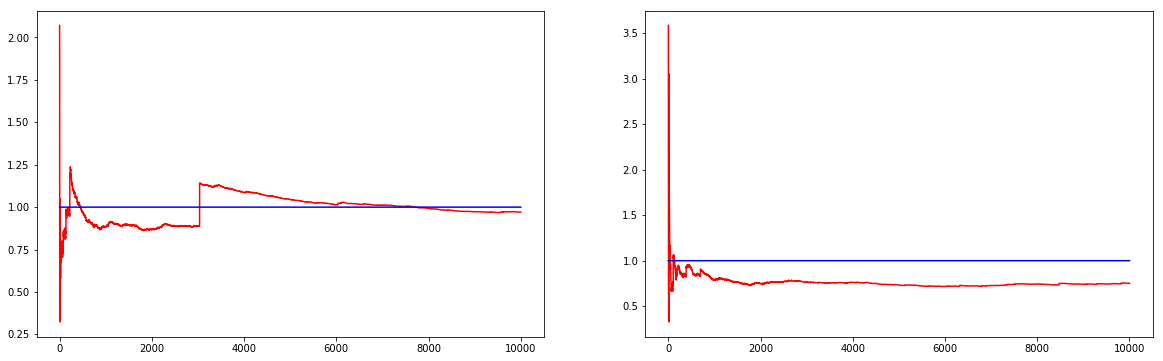

In [26]:
# Місце для Вашого коду

# Місце для Вашого коду
from scipy.stats import expon, norm
xi=expon(loc=0, scale=1)

x=np.arange(1, 10001)
rvs=xi.rvs(10000)
a=np.cumsum((rvs>1)*(rvs**(-2))/xi.pdf(rvs))
n=np.arange(1, 10001)
x1=np.arange(1, 10001, 0.01)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].plot(x, a/n, 'r')
axs[0].plot(x1, x1*0+1, 'b')

xi1=norm()

rvs_=xi1.rvs(10000)
a1=np.cumsum((rvs_>1)*(rvs_**(-2))/xi1.pdf(rvs_))


axs[1].plot(x, a1/n, 'r')
axs[1].plot(x1, x1*0+1, 'b')
plt.show()

In [ ]:
Далі виконання задач допрацьовується

## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Рівномірний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Uniform(0, 1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 4, 5, 10$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

1
5.0
[[2.05489054]
 [7.75123652]
 [4.76937823]
 ...
 [2.66068511]
 [4.66689738]
 [9.28642409]]
[-2.94510946  2.75123652 -0.23062177 ... -2.33931489 -0.33310262
  4.28642409]
(array(5.), array(8.33333333))


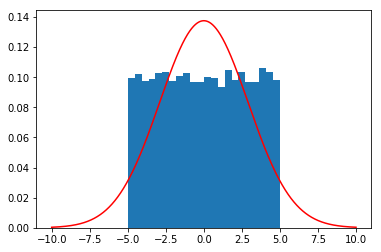

2
5.0
[[9.17394097 2.40515904]
 [0.64042309 0.99604281]
 [8.13326086 2.36618199]
 ...
 [2.54573919 5.45135466]
 [5.50451758 8.95389381]
 [7.08609008 7.20893753]]
[ 1.11659233 -5.91391167  0.35315943 ... -1.41626852  3.15257293
  3.03704315]
(array(5.), array(8.33333333))


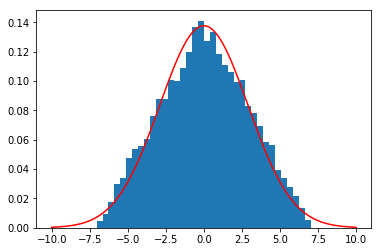

3
5.0
[[9.57505707 3.94075997 9.12375278]
 [4.41604198 7.71011682 0.8887294 ]
 [8.84194645 2.03751314 1.08741035]
 ...
 [9.44267224 3.45750161 6.12048552]
 [4.14851822 1.19814751 7.00664644]
 [9.93205875 2.40180747 2.18305059]]
[ 4.41070769 -1.14610483 -1.75117846 ...  2.32132877 -1.52806593
 -0.27890821]
(array(5.), array(8.33333333))


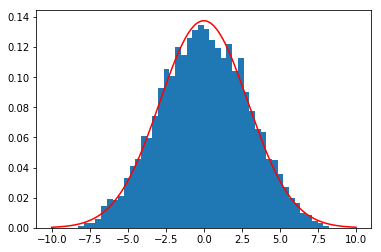

4
5.0
[[1.4020412  6.37940171 7.85595745 9.29281202]
 [3.8245242  8.84691417 2.71276135 0.36286756]
 [9.87278345 3.6618571  9.58673381 8.97636498]
 ...
 [4.82450455 2.4912762  5.29060323 3.04463551]
 [8.49446726 1.69280735 8.37129221 5.48246451]
 [0.96420123 9.21321323 7.49489616 2.97761741]]
[ 2.46510619 -2.12646636  6.04886967 ... -2.17449025  2.02051567
  0.32496402]
(array(5.), array(8.33333333))


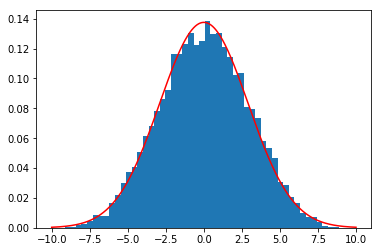

5
5.0
[[9.52370402 4.95666322 1.34719402 4.12358276 1.84664634]
 [9.3056382  1.79697846 2.65582268 8.23737211 7.32506878]
 [5.08160002 2.72148637 0.41427661 3.18511296 7.36706393]
 ...
 [0.7107499  7.1967128  6.60691851 0.9428857  6.06358938]
 [3.81225558 5.92611661 4.43040939 5.98699471 4.71204579]
 [2.8613391  5.11717961 3.77305256 4.25983127 8.43202438]]
[-1.43207169  1.93235639 -2.78634647 ... -1.55592037 -0.05911176
 -0.24890706]
(array(5.), array(8.33333333))


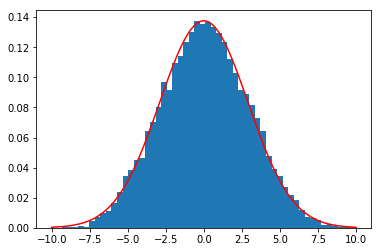

10
5.0
[[6.78054451 8.24808088 9.16004943 ... 7.03470069 4.79259258 3.96977897]
 [2.01675314 9.34805    8.90367045 ... 3.65418328 8.85662467 7.07207472]
 [3.85717282 1.18130692 2.12961158 ... 6.74785337 0.95040347 3.24102934]
 ...
 [1.04230283 8.52614136 2.88262237 ... 1.58029866 7.77682511 6.93291451]
 [0.73237696 9.94077014 8.81482984 ... 9.56001134 7.76342736 3.23361862]
 [0.08080414 4.85761768 9.13746608 ... 2.651183   7.35664454 6.94621558]]
[ 2.90074608  3.37749216 -4.47605021 ... -0.79111897  4.88385099
  1.19177635]
(array(5.), array(8.33333333))


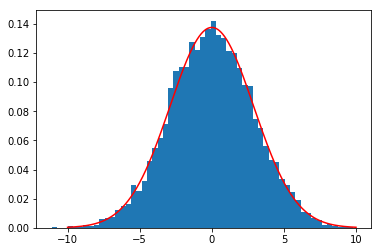

10000
5.0
[[7.3093803  0.64957984 8.13684272 ... 2.55232263 5.85006251 7.39032334]
 [8.82322685 6.92860506 3.61870199 ... 9.44536143 6.41895135 3.57519009]
 [7.6045274  6.45164074 7.84473634 ... 6.82404954 4.22961146 4.85534295]
 ...
 [6.73348553 6.68561824 0.29923027 ... 9.73017408 9.13981347 2.75053619]
 [4.87149824 2.0208106  9.29599319 ... 7.17562982 9.97096042 3.36583654]
 [8.39670601 3.84386122 2.2850615  ... 7.45223005 0.7728321  9.02659395]]
[ 3.13612937e+00  3.00144364e+00 -1.67919846e-03 ...  3.40022916e-01
 -2.00197854e+00 -3.85890551e+00]
(array(5.), array(8.33333333))


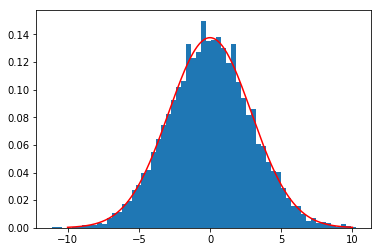

In [60]:
# Місце для Вашого коду
# Місце для Вашого коду
𝑛=[1,2,3, 4, 5, 10, 10000]
for n_ in n:
    print(n_)
    xi=uniform(loc=0, scale=1)
    l=(xi.expect())
    print(l)
    𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠=10000
    rvs=xi.rvs(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠*n_)
    rvs.shape=(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠, n_)
    print(rvs)
    #print(rvs)
    #print(np.shape(np.sum(rvs-1, axis=1)), n_)
    #print(np.sum(rvs-1, axis=1))
    rez=1/np.sqrt(n_)*(np.sum(rvs-l, axis=1))
    print(rez)
    plt.hist(rez, normed=True, bins='auto')
    x=np.arange(-10, 10+0.01, 0.01)
    print(xi.stats())
    dzeta=norm(loc=0,scale=0.29)#тут мав би бути scale=1/12(scale1^2), а виходить по графікам 0.29* scale1. Причину не розумію
    y=dzeta.pdf(x)
    plt.plot(x, y, 'r')
    plt.show()


### 3.2 Задача 1.23.13

Випадкові величини $(\xi_n, n \geq 1)$ незалежні, $P(\xi_n = \pm 1) = 1/2$.
Довести, що
$\displaystyle \max_{1 \leq k \leq n} \frac{\xi_1 + \ldots + \xi_k}{\sqrt{n}}
\xrightarrow{w} \left| \zeta \right|, \quad n \to \infty$,
де $\zeta \sim N(0, 1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \max_{1 \leq k \leq n} \frac{\xi_1 + \ldots + \xi_k}{\sqrt{n}}$;
- графік функції щільності $\left| \zeta \right|$, де $\zeta \sim N(0, 1)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.cumsum(axis=1)` та `numpy.max(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\zeta \sim N(0, 1)$, то $\left| \zeta \right| \sim HalfNorm(0, 1)$.

(10000, 1)


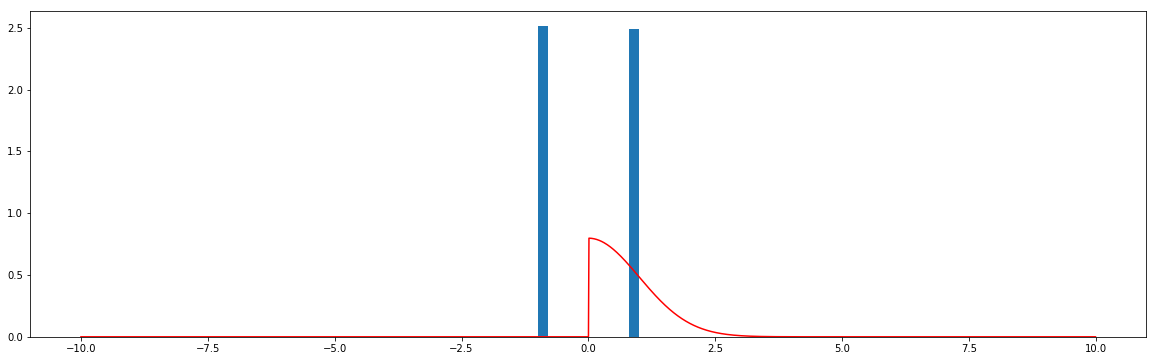

(10000, 2)


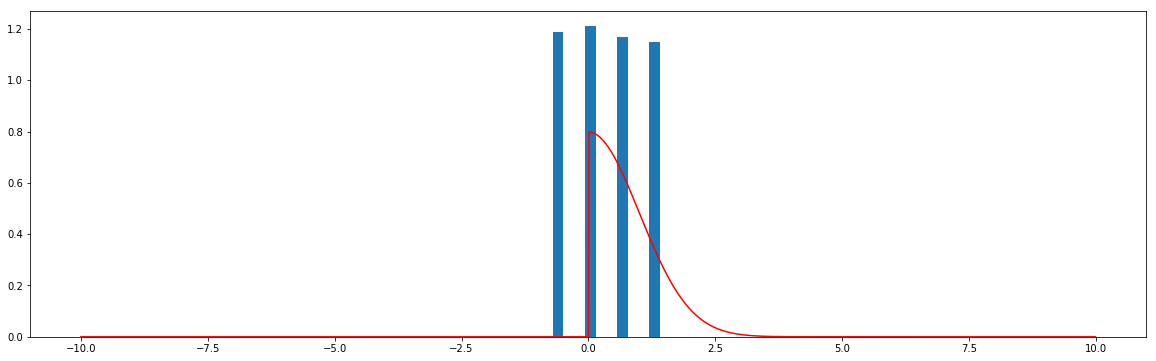

(10000, 3)


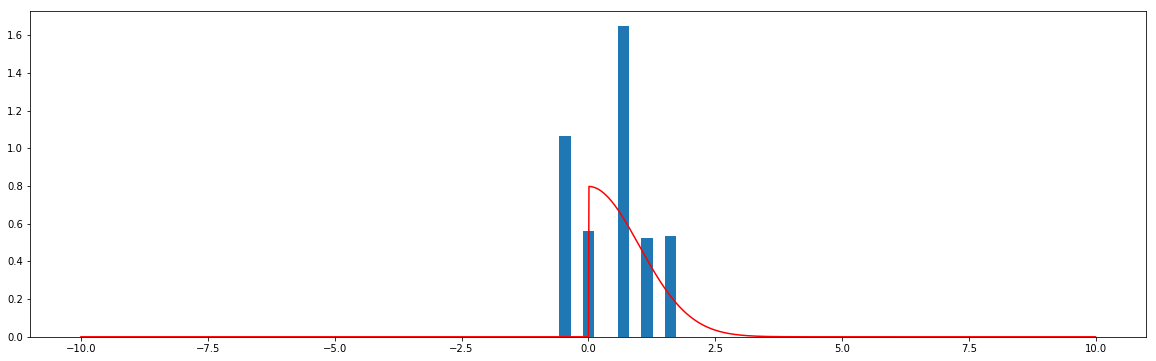

(10000, 5)


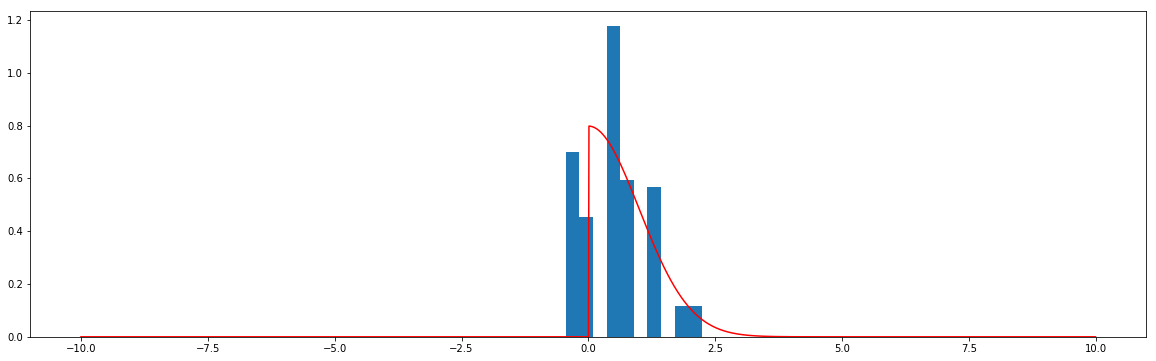

(10000, 10)


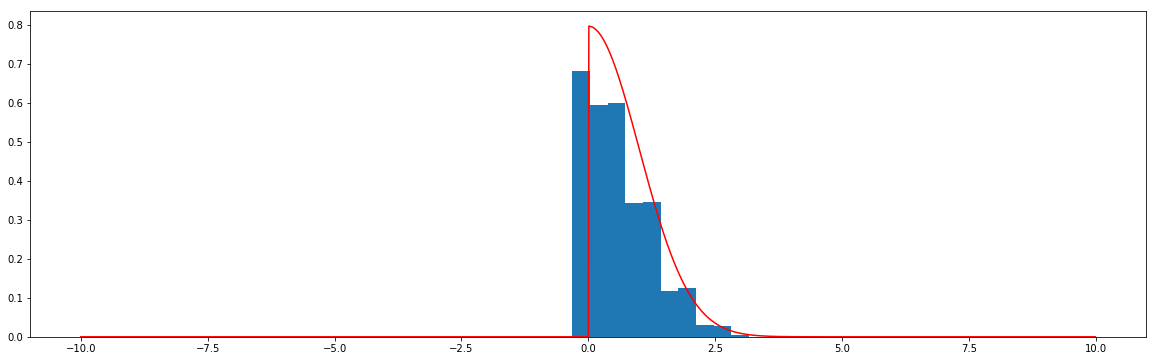

(10000, 25)


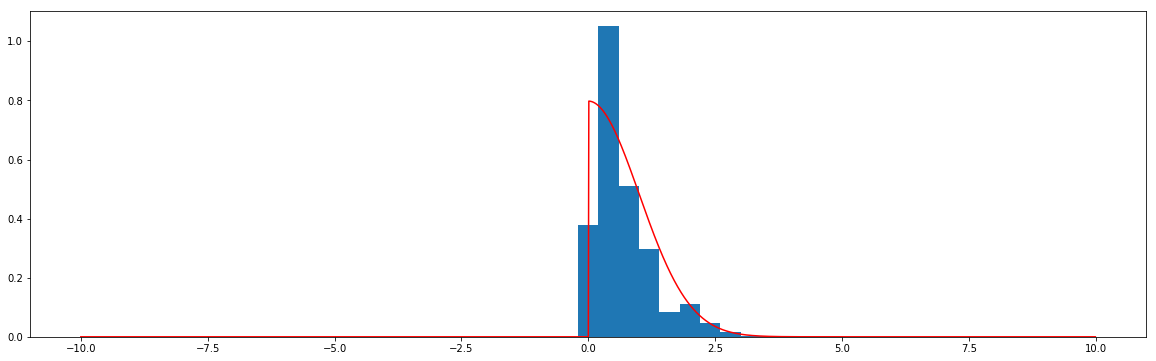

(10000, 50)


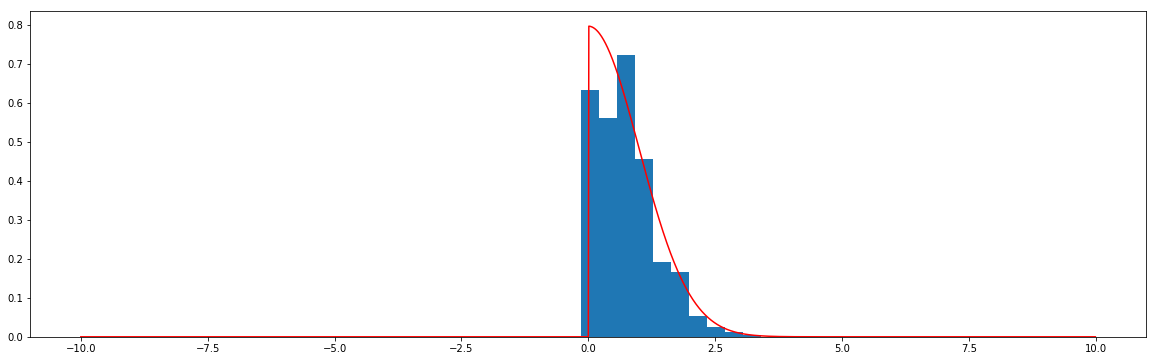

(10000, 100)


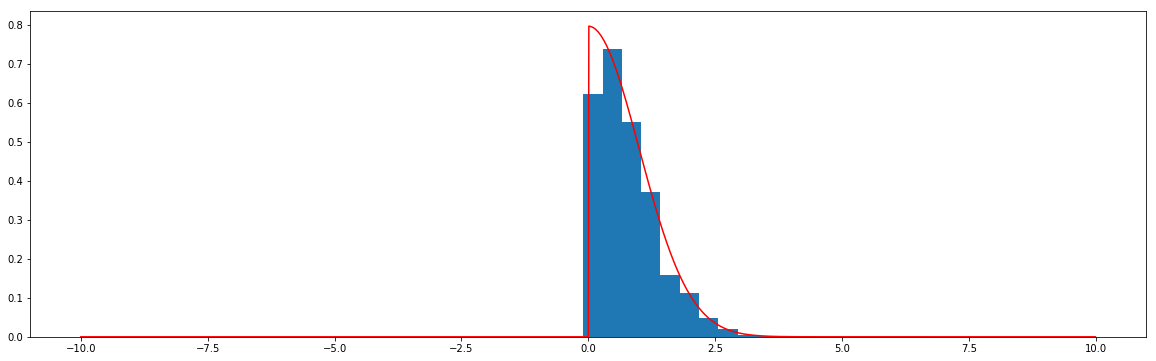

(10000, 250)


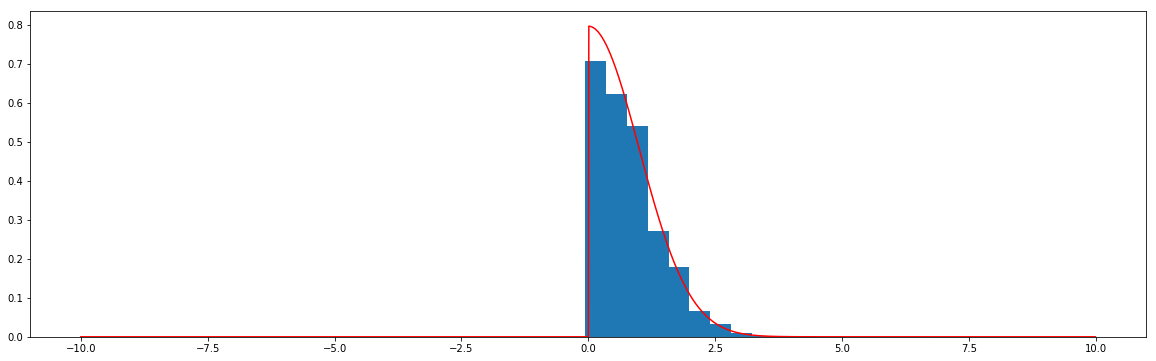

(10000, 500)


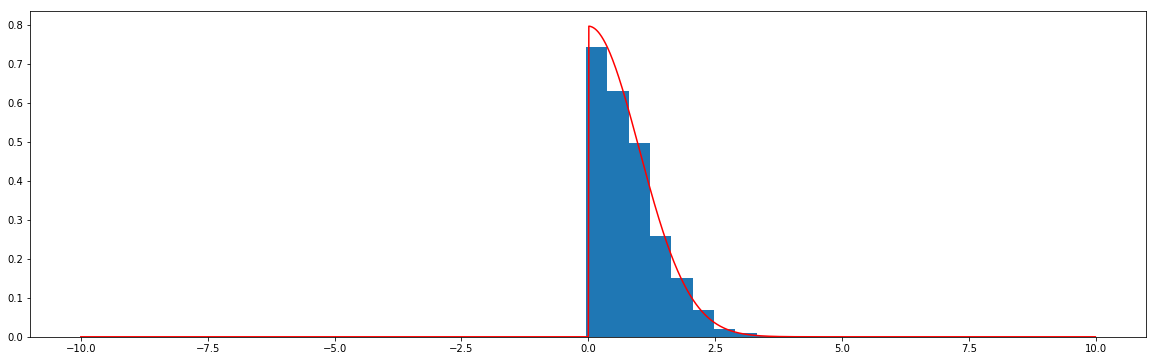

(10000, 1000)


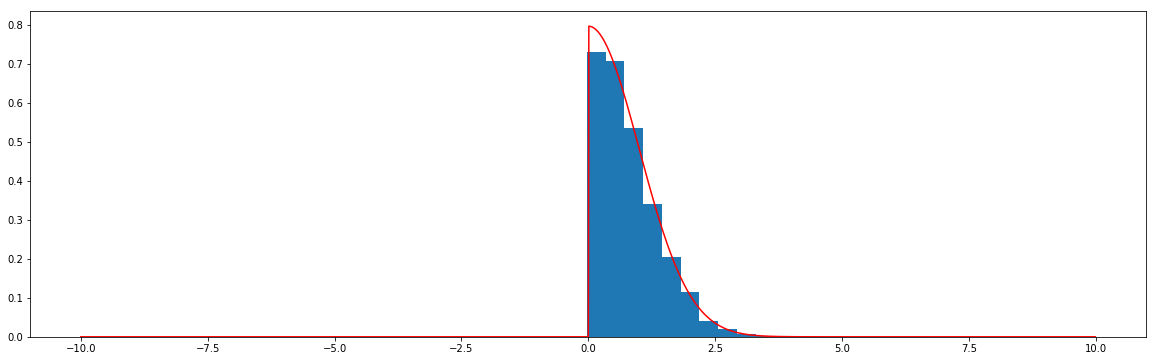

(10000, 5000)


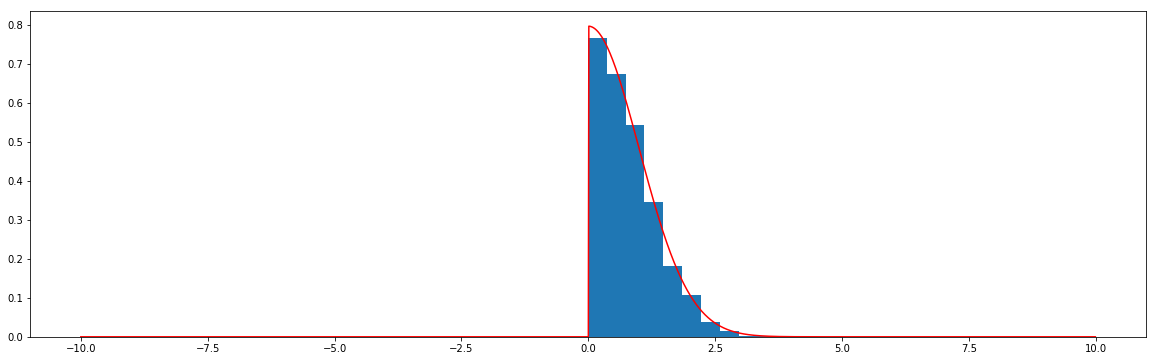

(10000, 10000)


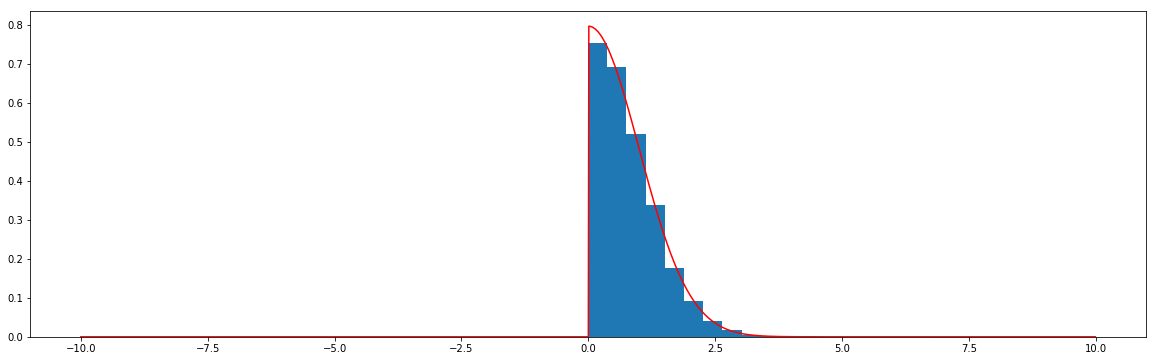

In [77]:
# Місце для Вашого коду
from scipy.stats import halfnorm
a = [-1, 1]
probs = [0.5, 0.5]
replace = True
𝑛=[1,2,3,5,10,25,50,100,250,500,1000,5000,10000]
for n_ in n:
    𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠=10000
    size=(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠*n_)
    rvs=(np.random.choice(a, size=size, replace=replace, p=probs))
    rvs.shape=(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠, n_)
    #print(rvs)
    rez=np.cumsum(rvs, axis=1)/np.sqrt(n_)
    
    print(rez.shape)
    rez_=np.max(rez, axis=1)
    #print(rez_)
    dzeta=halfnorm(0, 1)
    x1=np.arange(-10, 10, 0.01)

    fig, axs=plt.subplots(1, 1, figsize=(20, 6))
    axs.plot(x1, dzeta.pdf(x1), 'r')

    axs.hist(rez_, normed='True')

    plt.show()


### 3.3 Задача 1.23.30

Випадкові величини $(\xi_k, k \geq 1)$ незалежні та $\xi_k \sim Exp(1)$,
$\displaystyle \widehat{\mu}_n = \frac{\xi_1 + \ldots + \xi_n}{n}$.
Довести, що
$\displaystyle \sqrt{n} \, \frac{\widehat{\mu}_n - 1}{\sqrt{\widehat{\mu}_n}}
\xrightarrow{w} \zeta \sim N(0, 1), \quad n \to \infty$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \sqrt{n} \, \frac{\widehat{\mu}_n - 1}{\sqrt{\widehat{\mu}_n}}$;
- графік функції щільності $\zeta \sim N(0, 1)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

1


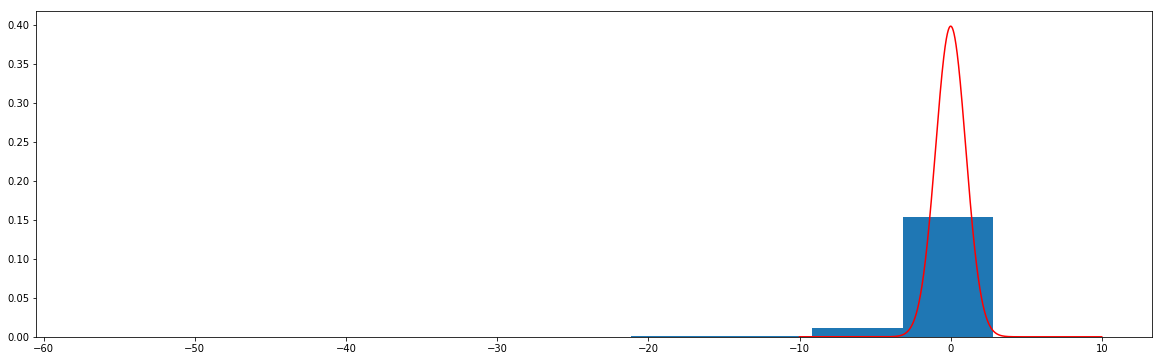

1


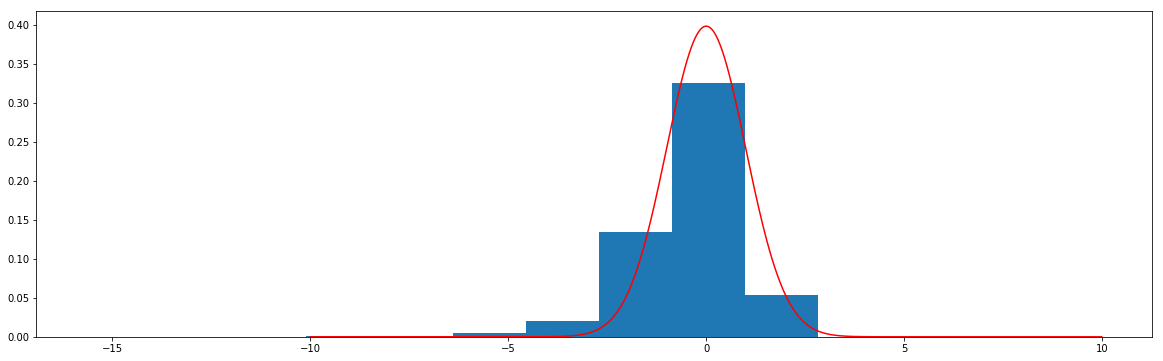

1


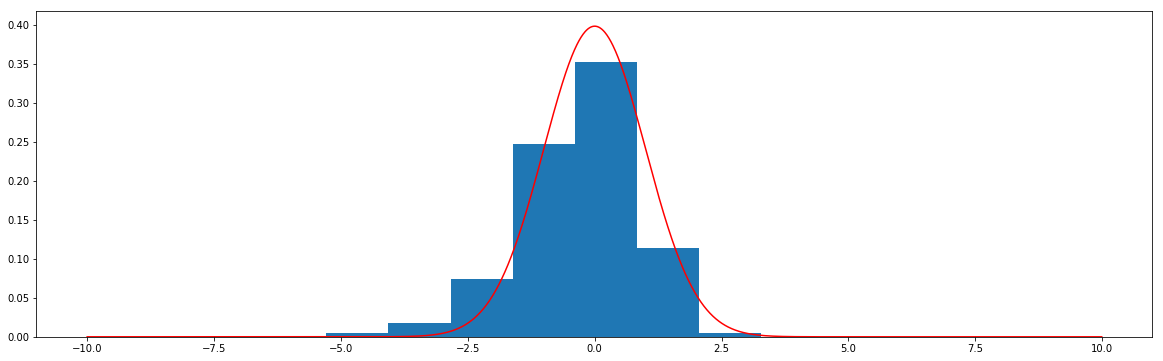

1


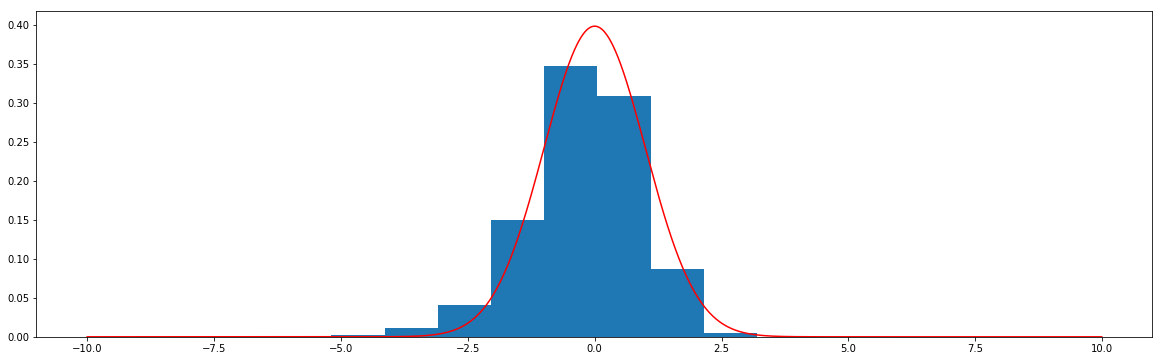

1


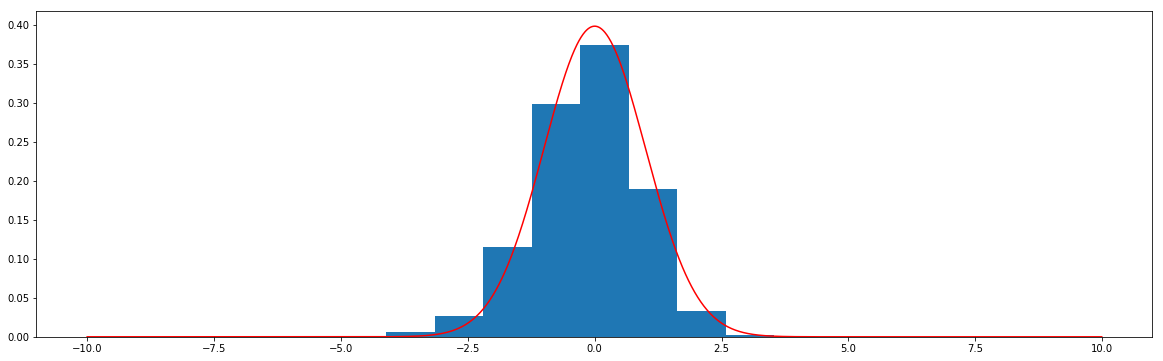

1


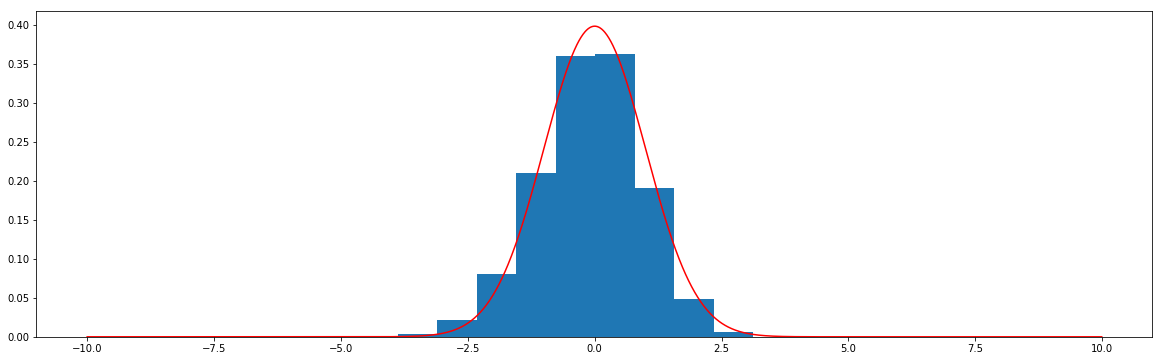

1


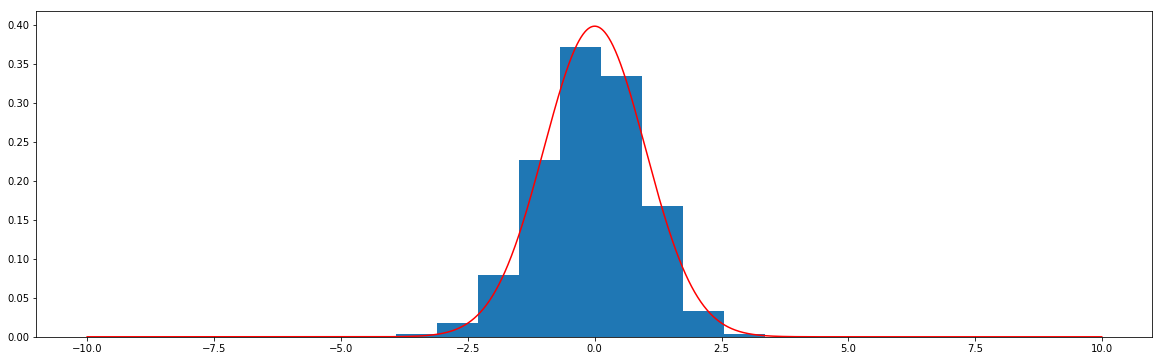

1


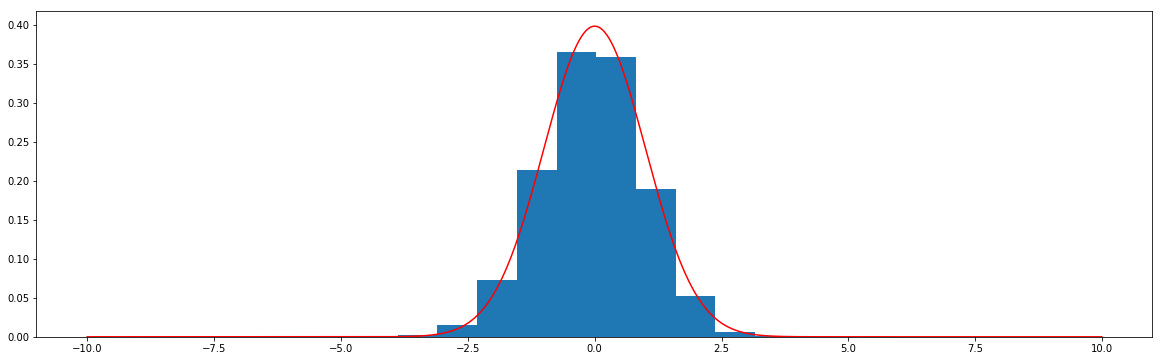

1


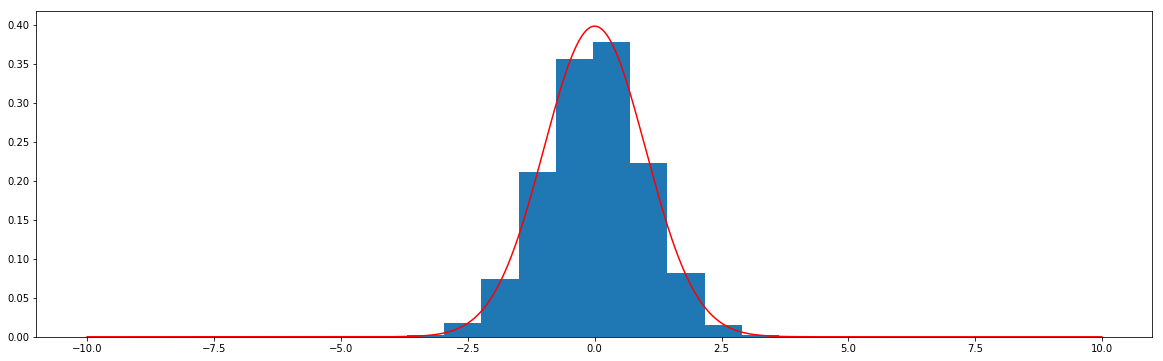

In [66]:
# Місце для Вашого коду

𝑛=[1,2,3,5,10, 25, 50, 100, 200] 
for n_ in n:
    xi=expon(scale=1)
    𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠=10000
    rvs=xi.rvs(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠*n_)
    rvs.shape=(𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠, n_)

    print(i)
    xi=uniform(loc=0, scale=1)
    rozmir=10000*i
    xi_rvs=xi.rvs(rozmir)
    xi_rvs.shape=(10000, i)
    m=np.sum(rvs, axis=1)/n_
    rvs=np.sqrt(n_)*(m-1)/np.sqrt(m)
    dzeta=norm(0, 1)

    
    x1=np.arange(-10, 10, 0.01)

    fig, axs=plt.subplots(1, 1, figsize=(20, 6))
    axs.plot(x1, dzeta.pdf(x1), 'r')

    axs.hist(rvs, normed='True')

    plt.show()
